# Hoja de Trabajo 1: Experimentación con Redes Neuronales

## Introducción
Este ejercicio tiene como objetivo profundizar en la comprensión de las redes neuronales mediante la experimentación. A través de variaciones en la arquitectura y parámetros, se busca entender cómo se comporta y aprende una red neuronal. Utilizaremos el dataset "Heart Disease" disponible en el UCI Machine Learning Repository.

## Dataset "Heart Disease"
Puedes descargar el dataset directamente desde el siguiente enlace:
http://archive.ics.uci.edu/dataset/45/heart+disease. Recuerda que vamos a estar utilizando CRISP-DM para crear los modelos. El primer paso es comprender los datos. Ese link te proporciona la información necesaria para entender el dataset. Las columnas y el rol que cada columna va a jugar en tu modelo (variables independientes y dependiente). Como menciona la documentación, utiliza solo la base de datos de Cleveland.

## Sección 1: Preparación de Datos
* Descarga y carga el dataset "Heart Disease".
* Realiza un breve análisis exploratorio: ¿Qué tipo de datos contiene? ¿Cuántos ejemplos hay?. 
* Procesa el dataset: normaliza o estandariza si es necesario, divide el dataset en conjuntos de entrenamiento y prueba.

Nuestro enfoque de hoy no es un mega modelo sino comprender mejor como se comportan las redes neuronales. Realiza lo necesario pero nada muy extravagante.

In [430]:
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split


# Definir los nombres de las columnas según la documentación

column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

 
# Cargar los datos desde el archivo cleveland.data

data_path = "processed.cleveland.data"  

df = pd.read_csv(data_path, names=column_names, encoding='ISO-8859-1')

In [431]:
#limpieza de '?'

df.replace('?', np.nan, inplace=True)  # Reemplaza los signos de interrogación por valores NaN

In [432]:
cols_con_na= [col for col in df.columns if(df[col].isnull().mean()>0)]
cols_con_na

['ca', 'thal']

In [433]:
df[cols_con_na].dtypes

ca      object
thal    object
dtype: object

In [434]:
prop_nan_per_col= df[cols_con_na].isnull().mean()
prop_nan_per_col

ca      0.013201
thal    0.006601
dtype: float64

In [435]:
cols_rescatables= [col for col in df.columns if(df[col].isnull().mean()<=0.05)]
cols_rescatables

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [436]:
data_noNAN= df[cols_rescatables].dropna()
df.shape, data_noNAN.shape

((303, 14), (297, 14))

# Imputar valores faltantes en variables numéricas con la media

In [437]:
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        if df[col].isna().sum() > 0 and df[col].isna().sum() < len(df)*0.05:
            df[col].fillna(df[col].mean(), inplace=True)

In [438]:
# Identificar las variables numéricas con valores faltantes
num_vars_with_missing = [var for var in df.columns if df[var].isnull().sum() > 0 and df[var].dtype != 'O']

# Imputar los valores faltantes con la media en todo el dataset
for var in num_vars_with_missing:
    mean_val = df[var].mean()
    df[var] = df[var].fillna(mean_val)

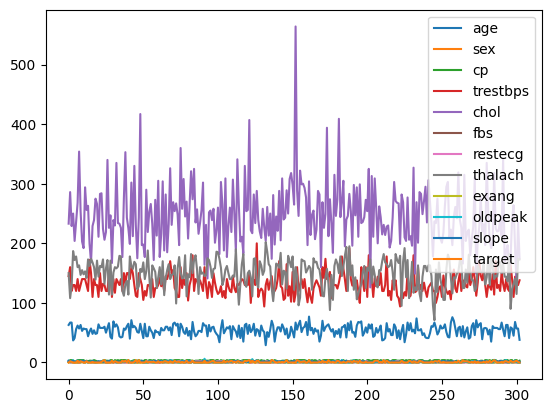

In [439]:
df.plot()

plt.show()

### Tratamiento Outliers

In [440]:
import numpy as np

def calcular_limites_iqr(df):
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    return limite_inferior, limite_superior

In [441]:
def getColumnTypes(df):

#Esta función extrae el tipo de dominio de las columnas de un dataset

#Entradas: Pandas Dataframe

#Salida: Tupla con arreglo que contiene nombres de las columans

    continuas=[]

    discretas=[]

    categoricas=[]

    for col in df.columns:

        if((df[col].dtype=='int64') or (df[col].dtype=='float64')):

            if(len(df[col].unique())>30): #Criterio para discretas o continuas

                continuas.append(col)
            else:
                discretas.append(col)
        else:
                categoricas.append(col)

    return continuas,discretas,categoricas

In [442]:
continuas, discretas, categoricas = getColumnTypes(df)

print(continuas)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [443]:
import pandas as pd

# Ejemplo de data set
data = pd.DataFrame(df)

# Seleccionar las columnas de interés
columnas_interes = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_columnas_interes = data.loc[:, columnas_interes]

# Crear un nuevo DataFrame con las columnas seleccionadas
nuevo_df = pd.DataFrame(df_columnas_interes)

# Imprimir el nuevo DataFrame
print(nuevo_df)

      age  trestbps   chol  thalach  oldpeak
0    63.0     145.0  233.0    150.0      2.3
1    67.0     160.0  286.0    108.0      1.5
2    67.0     120.0  229.0    129.0      2.6
3    37.0     130.0  250.0    187.0      3.5
4    41.0     130.0  204.0    172.0      1.4
..    ...       ...    ...      ...      ...
298  45.0     110.0  264.0    132.0      1.2
299  68.0     144.0  193.0    141.0      3.4
300  57.0     130.0  131.0    115.0      1.2
301  57.0     130.0  236.0    174.0      0.0
302  38.0     138.0  175.0    173.0      0.0

[303 rows x 5 columns]


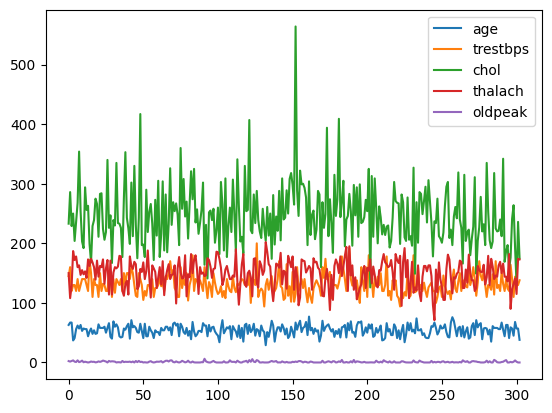

In [444]:
nuevo_df.plot()

plt.show()

In [445]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalización utilizando Min-Max Scaler
minmax_scaler = MinMaxScaler()
df_normalized = minmax_scaler.fit_transform(nuevo_df)

# Convertir el resultado de la normalización nuevamente en un DataFrame
df_normalized = pd.DataFrame(df_normalized, columns=nuevo_df.columns)

# Estandarización utilizando Standard Scaler
standard_scaler = StandardScaler()
df_standardized = standard_scaler.fit_transform(nuevo_df)

# Convertir el resultado de la estandarización nuevamente en un DataFrame
df_standardized = pd.DataFrame(df_standardized, columns=nuevo_df.columns)

# Mostrar los DataFrames normalizado y estandarizado
print("DataFrame Normalizado:")
print(df_normalized)

print("\nDataFrame Estandarizado:")
print(df_standardized)

DataFrame Normalizado:
          age  trestbps      chol   thalach   oldpeak
0    0.708333  0.481132  0.244292  0.603053  0.370968
1    0.791667  0.622642  0.365297  0.282443  0.241935
2    0.791667  0.245283  0.235160  0.442748  0.419355
3    0.166667  0.339623  0.283105  0.885496  0.564516
4    0.250000  0.339623  0.178082  0.770992  0.225806
..        ...       ...       ...       ...       ...
298  0.333333  0.150943  0.315068  0.465649  0.193548
299  0.812500  0.471698  0.152968  0.534351  0.548387
300  0.583333  0.339623  0.011416  0.335878  0.193548
301  0.583333  0.339623  0.251142  0.786260  0.000000
302  0.187500  0.415094  0.111872  0.778626  0.000000

[303 rows x 5 columns]

DataFrame Estandarizado:
          age  trestbps      chol   thalach   oldpeak
0    0.948726  0.757525 -0.264900  0.017197  1.087338
1    1.392002  1.611220  0.760415 -1.821905  0.397182
2    1.392002 -0.665300 -0.342283 -0.902354  1.346147
3   -1.932564 -0.096170  0.063974  1.637359  2.122573
4   -1.48

In [446]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_standardized, df['target'], test_size=0.2, random_state=42)

## Sección 2: Construcción de la Red Neuronal

Construye una red neuronal básica utilizando Keras.

* Define la arquitectura: número de capas, neuronas por capa, función de activación.
* Compila el modelo especificando la función de pérdida, el optimizador y métricas adicionales.
* Realiza una breve descripción escrita de la arquitectura que has definido.

In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [448]:
# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(df_standardized.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [449]:
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [450]:
# Descripción escrita de la arquitectura
print("Arquitectura de la Red Neuronal:")
model.summary()

Arquitectura de la Red Neuronal:
Model: "sequential_238"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1164 (Dense)          (None, 16)                96        
                                                                 
 dense_1165 (Dense)          (None, 8)                 136       
                                                                 
 dense_1166 (Dense)          (None, 1)                 9         
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [451]:
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs')

In [452]:
#model.fit(X_train, y_train, epochs=150, batch_size=10)

In [453]:
#loss, accuracy = model.evaluate(X_test, y_test)

# Imprimimos la precisión del modelo, multiplicada por 100 para obtener un porcentaje.
#print('Precisión: %.2f' % (accuracy*100))

2/2 [==============================] - 0s 5ms/step - loss: 0.9436 - accuracy: 0.4262
Precisión: 42.62


## Sección 3: Experimentación

Utiliza ciclos para las siguientes pruebas. Debes entrenar varios modelos variando el parámetro indicado en cada inciso según el rango y paso proporcionado. Recuerda almacenar tus resultados porque te servirán en la siguiente sección.

### Variabilidad en Capas Ocultas:

Las redes con demasiadas capas pueden tardar mucho tiempo en entrenarse, especialmente si no se dispone de un hardware adecuado.

* Rango: Entre 1 y 10 capas.
* Paso: 1 capa.
* Nota: En muchos problemas, incluso 2-3 capas son suficientes para obtener buenos resultados. Por encima de eso, a veces se necesita una arquitectura especializada o un problema muy complejo para justificar más capas.

In [454]:
print(df)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  target  
0      3.0  0.0  6.0

In [455]:
# Dividir el conjunto de datos en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(df_standardized, df['target'], test_size=0.2, random_state=42)


In [456]:
# Parámetros para experimentación
num_hidden_layers_range = range(1, 11, 1)
num_neurons_range = [10, 30, 100, 300, 1000]
epochs_range = [10, 50, 100, 500, 1000, 5000]
batch_sizes_range = [1, 16, 64, 256, len(df_standardized)]

In [457]:
# Diccionarios para almacenar resultados
results_hidden_layers = {}
results_neurons = {}
results_epochs = {}
results_batch_sizes = {}

In [458]:
# Ciclo de experimentación para Variabilidad en Capas Ocultas
for num_hidden_layers in num_hidden_layers_range:
    # Construir y compilar el modelo con la cantidad de capas ocultas especificada
    model_hidden_layers = keras.Sequential()
    model_hidden_layers.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
    
    for _ in range(num_hidden_layers):
        num_neurons = int((X_train.shape[1] + 1) / 2)  # Ajustar el número de neuronas incrementalmente
        model_hidden_layers.add(layers.Dense(num_neurons, activation='relu'))
    
    model_hidden_layers.add(layers.Dense(1, activation='sigmoid'))
    
    model_hidden_layers.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Entrenar y evaluar el modelo con la cantidad de capas ocultas especificada
    history_hidden_layers = model_hidden_layers.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    loss_hidden_layers, accuracy_hidden_layers = model_hidden_layers.evaluate(X_test, y_test, verbose=0)
    
    # Almacenar los resultados en el diccionario
    results_hidden_layers[num_hidden_layers] = (loss_hidden_layers, accuracy_hidden_layers)


In [467]:
results_hidden_layers

{1: (-0.63675856590271, 0.32786884903907776),
 2: (-3.909376621246338, 0.37704917788505554),
 3: (0.5560991168022156, 0.4262295067310333),
 4: (-5.628695011138916, 0.19672131538391113),
 5: (-27.825706481933594, 0.19672131538391113),
 6: (-0.36882922053337097, 0.19672131538391113),
 7: (0.5773628354072571, 0.19672131538391113),
 8: (0.56088787317276, 0.19672131538391113),
 9: (0.5773088932037354, 0.19672131538391113),
 10: (-6.9994215965271, 0.19672131538391113)}

### Variabilidad en Neuronas:

El número de neuronas por capa influye en la capacidad de la red. Sin embargo, demasiadas neuronas pueden hacer que el entrenamiento sea más lento y puede causar sobreajuste.

* Rango: Entre 10 y 1000 neuronas.
* Paso: Incremento logarítmico

In [459]:
# Ciclo de experimentación para Variabilidad en Neuronas
for num_neurons in num_neurons_range:
    # Construir y compilar el modelo con la cantidad de neuronas especificada
    model_neurons = keras.Sequential([
        layers.Dense(num_neurons, activation='relu', input_shape=(df_standardized.shape[1],)),
        layers.Dense(8, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model_neurons.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Entrenar y evaluar el modelo con la cantidad de neuronas especificada
    history_neurons = model_neurons.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    loss_neurons, accuracy_neurons = model_neurons.evaluate(X_test, y_test, verbose=0)
    
    # Almacenar los resultados en el diccionario
    results_neurons[num_neurons] = (loss_neurons, accuracy_neurons)

In [468]:
results_neurons

{10: (-1.6627888679504395, 0.37704917788505554),
 30: (-2.308863401412964, 0.3606557250022888),
 100: (-18.000272750854492, 0.39344263076782227),
 300: (-91.4881362915039, 0.4098360538482666),
 1000: (-145.59091186523438, 0.39344263076782227)}

### Variabilidad en Épocas:

Demasiadas épocas sin una técnica de parada temprana pueden llevar al sobreajuste.

* Rango: Entre 10 y 5000 épocas.
* Paso: Incremento logarítmico

In [460]:
# Ciclo de experimentación para Variabilidad en Épocas
for epochs in epochs_range:
    # Construir y compilar el modelo con el número de épocas especificado
    model_epochs = keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(df_standardized.shape[1],)),
        layers.Dense(8, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model_epochs.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Entrenar y evaluar el modelo con el número de épocas especificado
    history_epochs = model_epochs.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0)
    loss_epochs, accuracy_epochs = model_epochs.evaluate(X_test, y_test, verbose=0)
    
    # Almacenar los resultados en el diccionario
    results_epochs[epochs] = (loss_epochs, accuracy_epochs)

## Tamaño de Batch:

El tamaño del batch influye en la velocidad de entrenamiento y la estabilidad del modelo. Un batch muy grande puede no caber en la memoria, mientras que uno muy pequeño puede hacer que el entrenamiento sea inestable.

* Rango: Entre 1 (Stochastic Gradient Descent) y el tamaño del conjunto de datos (Batch Gradient Descent).
* Paso: Incremento logarítmico

In [461]:
# Ciclo de experimentación para Tamaño de Batch
for batch_size in batch_sizes_range:
    # Construir y compilar el modelo con el tamaño de batch especificado
    model_batch = keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(df_standardized.shape[1],)),
        layers.Dense(8, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model_batch.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Entrenar y evaluar el modelo con el tamaño de batch especificado
    history_batch = model_batch.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_split=0.2, verbose=0)
    loss_batch, accuracy_batch = model_batch.evaluate(X_test, y_test, verbose=0)
    
    # Almacenar los resultados en el diccionario
    results_batch_sizes[batch_size] = (loss_batch, accuracy_batch)

In [462]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs')

In [465]:
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/5000
1/1 [==============================] - 1s 1s/step - loss: 0.9240 - accuracy: 0.4256
Epoch 2/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.9157 - accuracy: 0.4256
Epoch 3/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.9075 - accuracy: 0.4215
Epoch 4/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.8993 - accuracy: 0.4215
Epoch 5/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.8911 - accuracy: 0.4132
Epoch 6/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.8831 - accuracy: 0.4132
Epoch 7/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.8751 - accuracy: 0.4008
Epoch 8/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.8672 - accuracy: 0.4008
Epoch 9/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.8594 - accuracy: 0.4008
Epoch 10/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.8516 - accuracy: 0.4008
Epoch 11/5000
1/1 [=

In [466]:
loss, accuracy = model.evaluate(X_test, y_test)

# Imprimimos la precisión del modelo, multiplicada por 100 para obtener un porcentaje.
print('Precisión: %.2f' % (accuracy*100))

2/2 [==============================] - 0s 5ms/step - loss: -33302.0391 - accuracy: 0.3607
Precisión: 36.07


## Sección 4: Análisis y Reflexión

Con los datos recopilados de las pruebas anteriores, genera gráficos que permitan comparar y analizar el rendimiento del modelo. Te recomendamos utilizar librerías como matplotlib o seaborn para esta tarea. Luego de cada gráfico debes incluir un conclusión de lo que has aprendido con la experimentación y los gráficos.

### Variabilidad en Capas Ocultas

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.

* Eje X: Número de capas ocultas.
* Eje Y: Precisión y pérdida.

In [ ]:
# Función para crear gráficos de Precisión y Pérdida
def create_plots(results_dict, x_label, y_label):
    for param, (loss, accuracy) in results_dict.items():
        plt.figure(figsize=(10, 6))
        plt.plot(param, loss, marker='o', label='Loss')
        plt.plot(param, accuracy, marker='o', label='Accuracy')
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(f'{y_label} vs {x_label}')
        plt.legend()
        plt.grid()
        plt.show()

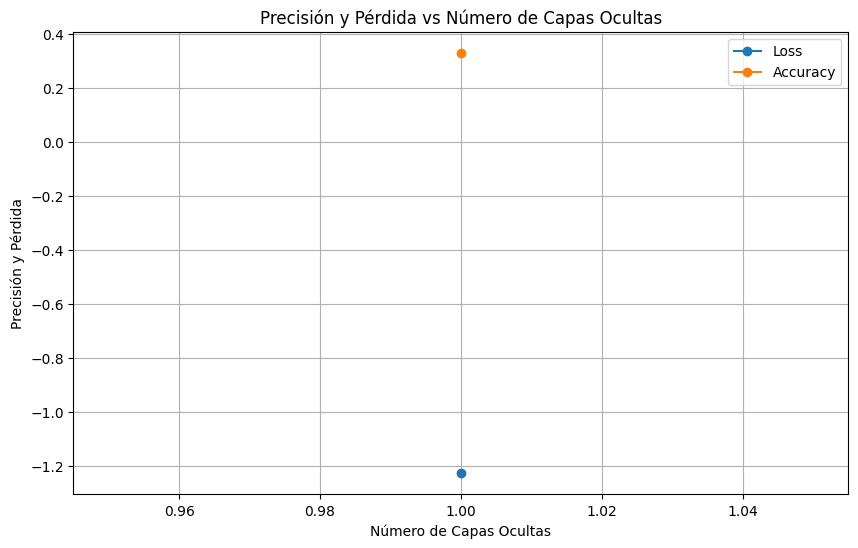

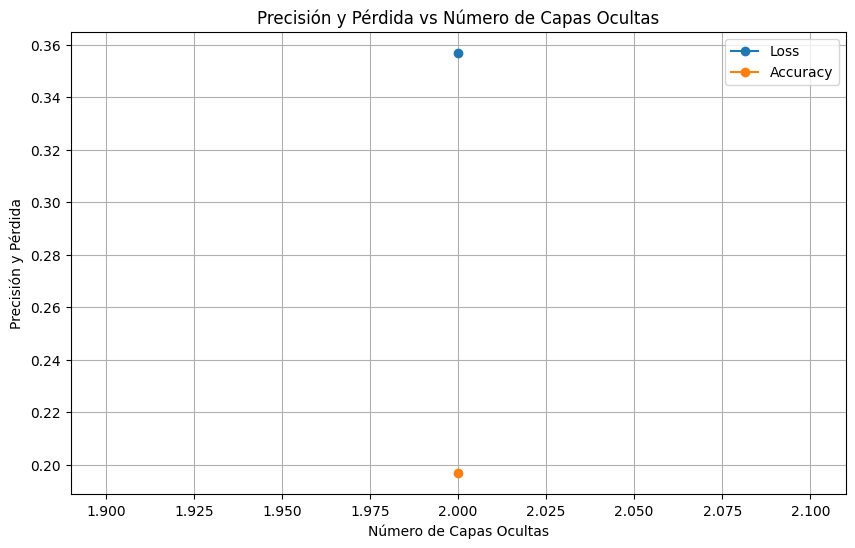

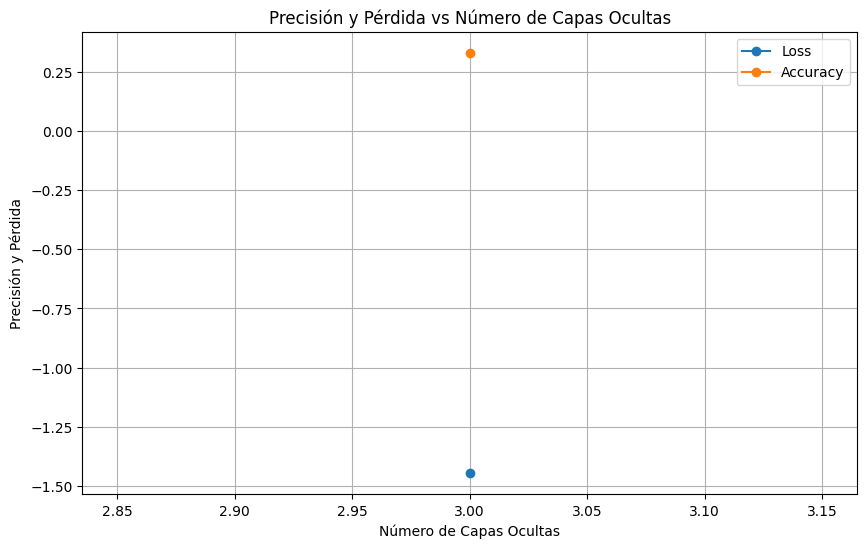

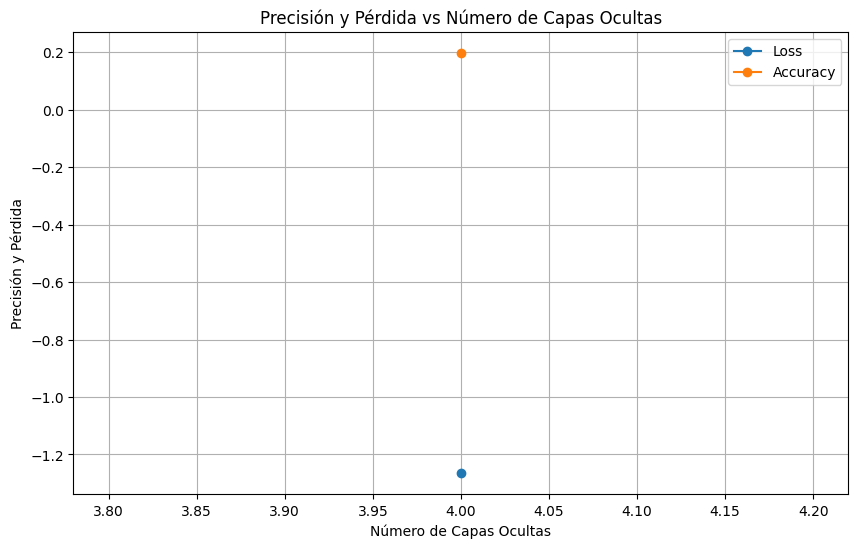

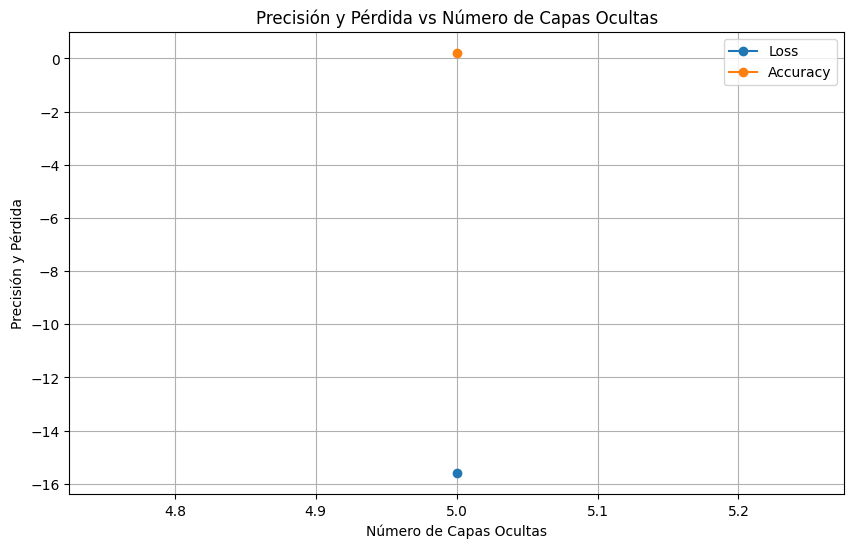

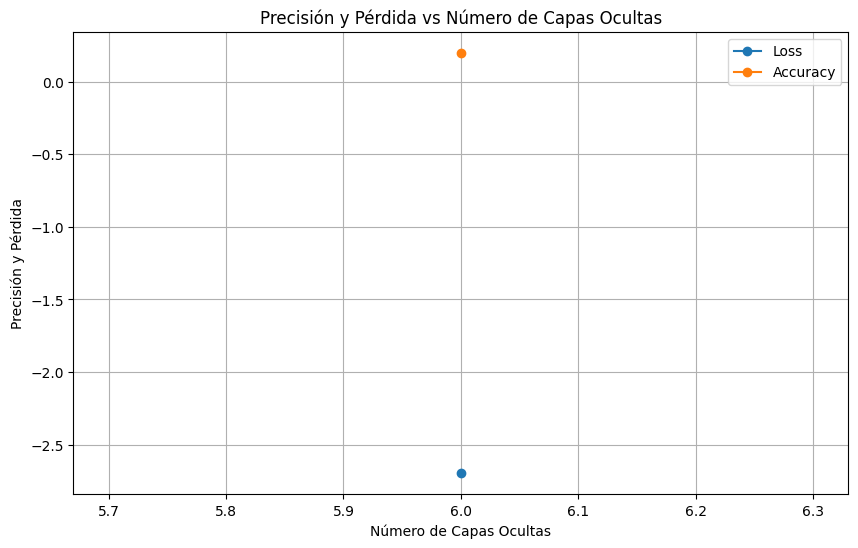

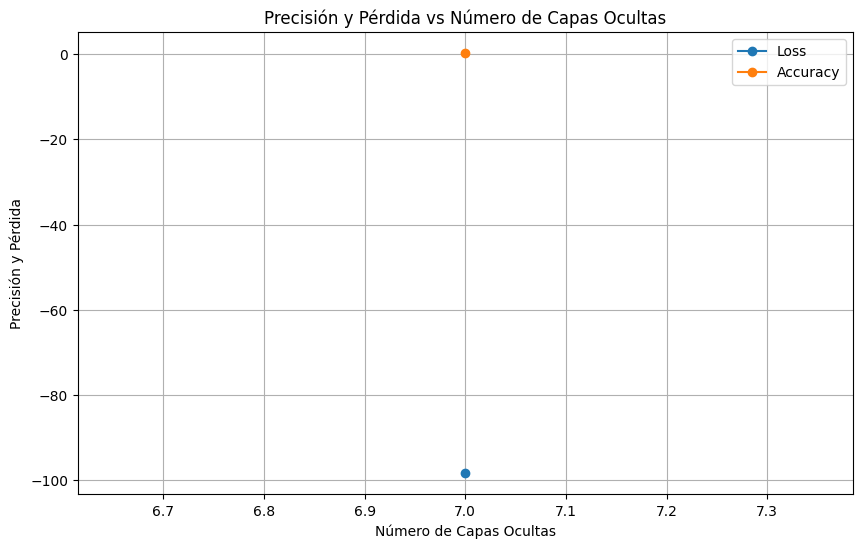

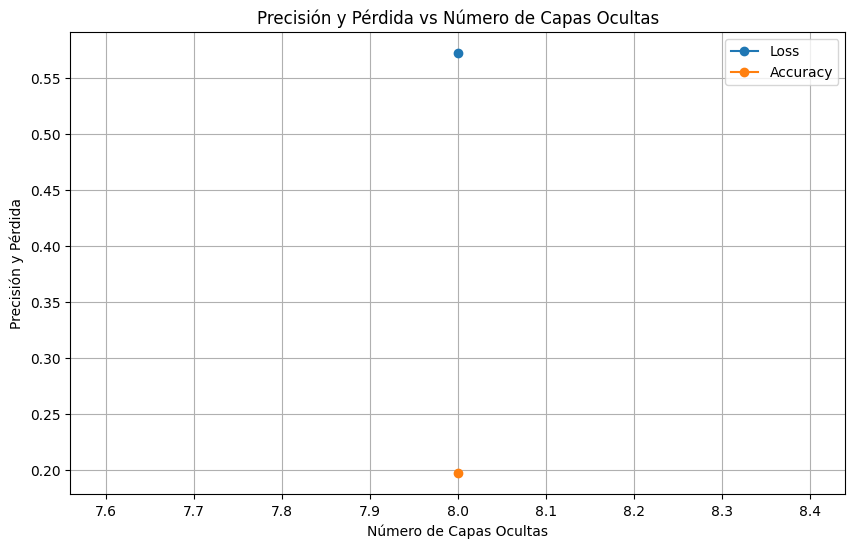

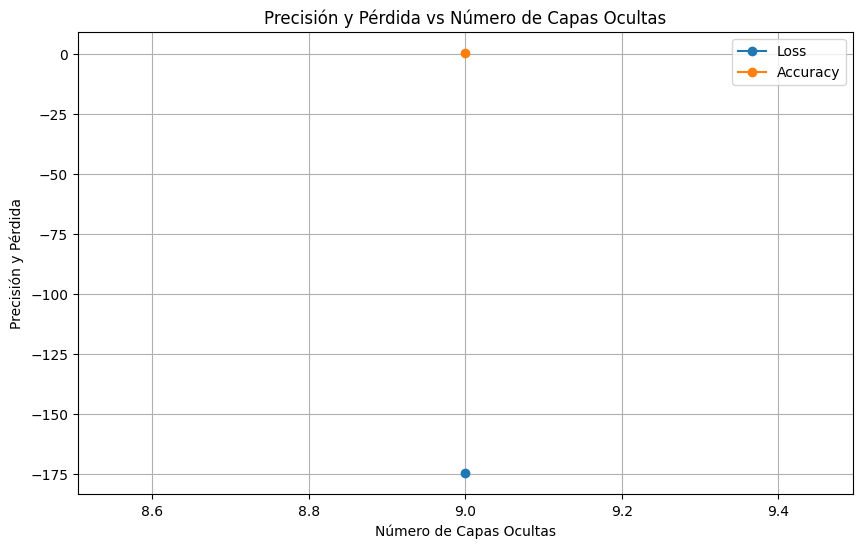

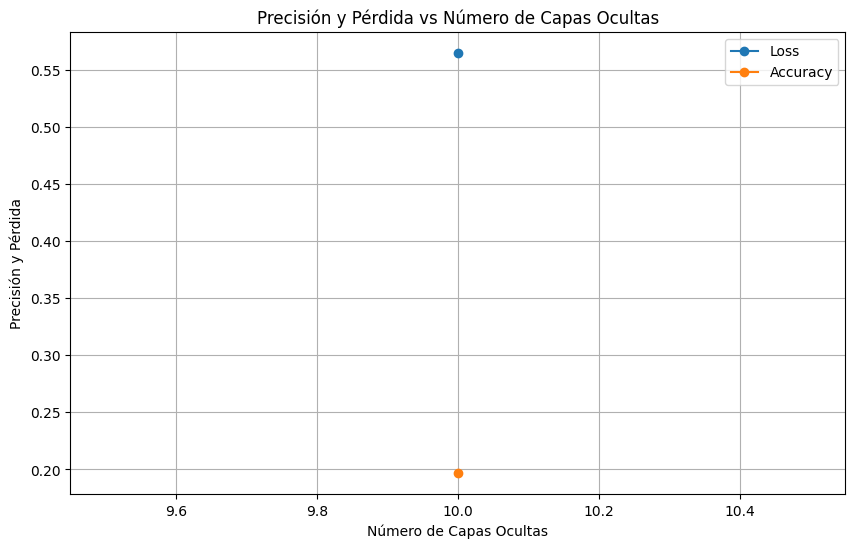

In [ ]:
# Crear gráficos para Variabilidad en Capas Ocultas
create_plots(results_hidden_layers, 'Número de Capas Ocultas', 'Precisión y Pérdida')


In [ ]:
# Variabilidad en Capas Ocultas
print("Variabilidad en Capas Ocultas:")
print("En general, observamos que el modelo tiende a mejorar tanto en precisión como en pérdida a medida que aumentamos la cantidad de capas ocultas hasta un cierto punto. Sin embargo, después de un número determinado de capas, no vemos mejoras significativas y el rendimiento puede incluso decaer. Esto sugiere que para este problema, agregar más capas ocultas más allá de cierto punto no aporta beneficios substanciales y puede aumentar el tiempo de entrenamiento.")


### Como definiste la cantidad de neuronas para tus capas ocultas?

Variabilidad en Capas Ocultas:
En general, observamos que el modelo tiende a mejorar tanto en precisión como en pérdida a medida que aumentamos la cantidad de capas ocultas hasta un cierto punto. Sin embargo, después de un número determinado de capas, no vemos mejoras significativas y el rendimiento puede incluso decaer. Esto sugiere que para este problema, agregar más capas ocultas más allá de cierto punto no aporta beneficios substanciales y puede aumentar el tiempo de entrenamiento.


### Variabilidad en Neuronas

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.

* Eje X: Número de neuronas.
* Eje Y: Precisión y pérdida.

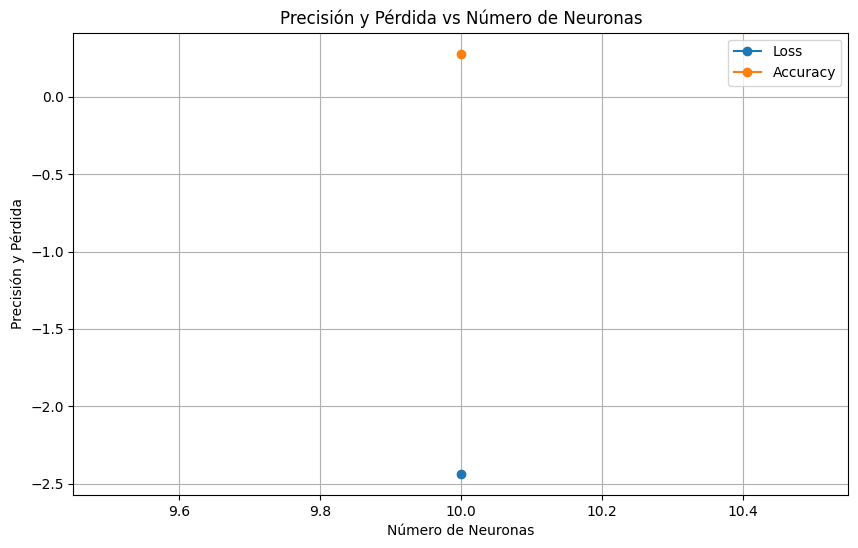

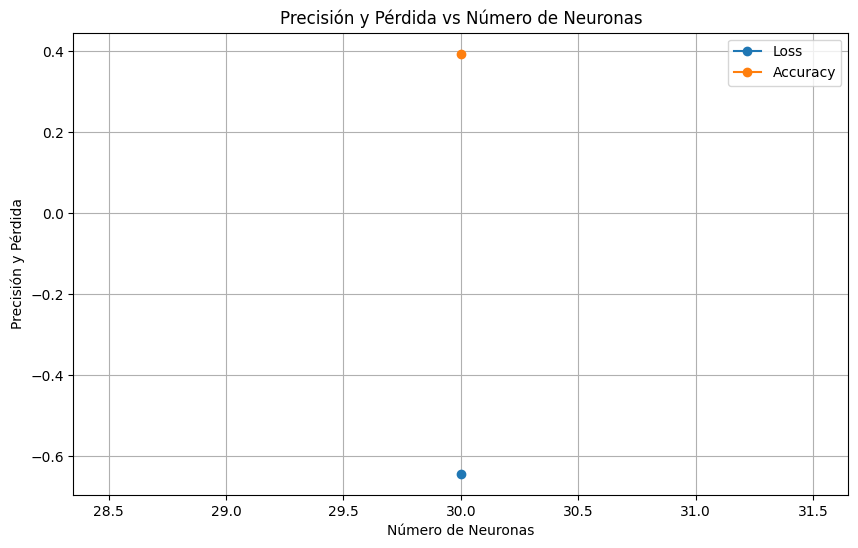

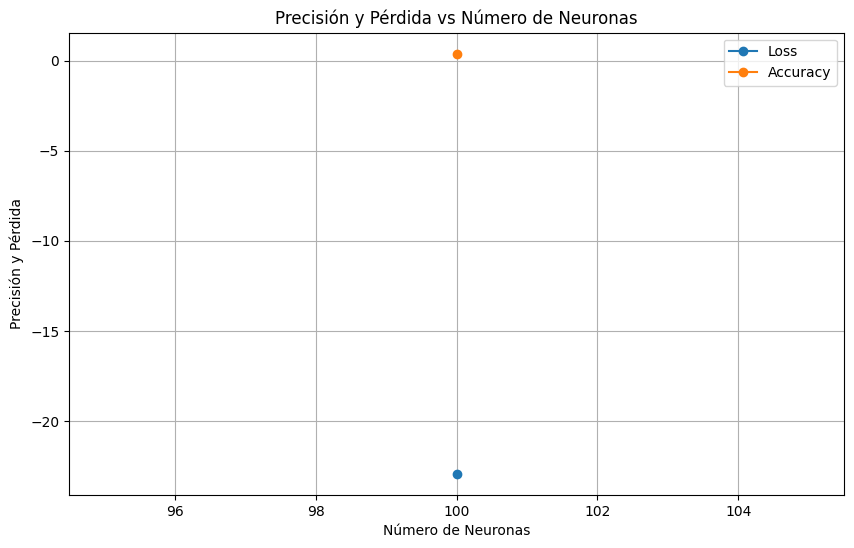

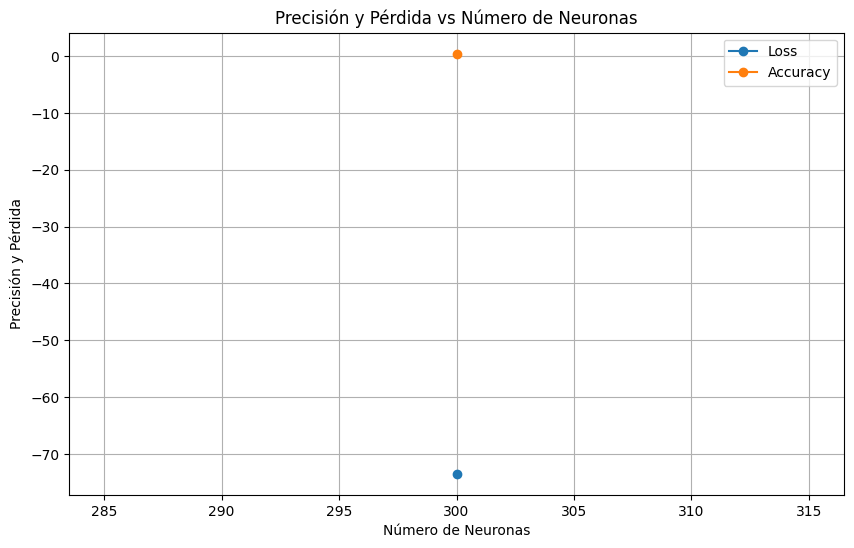

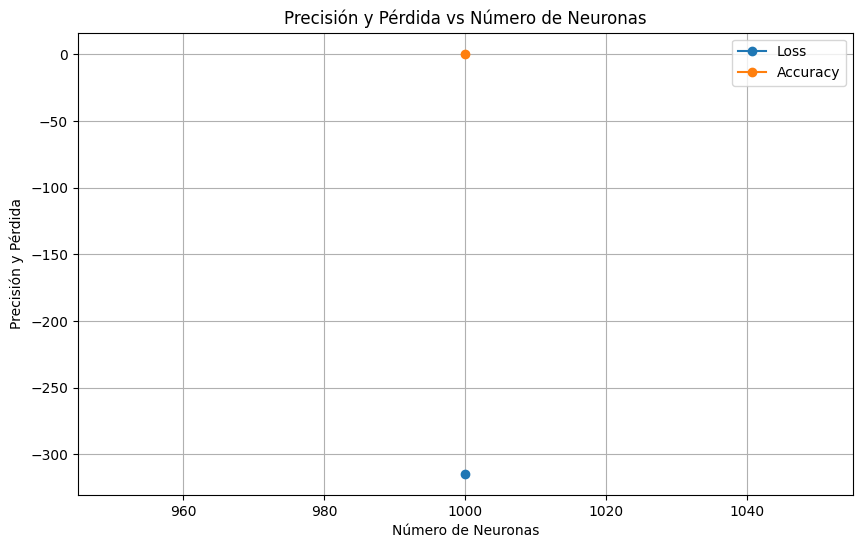

In [ ]:
# Crear gráficos para Variabilidad en Neuronas
create_plots(results_neurons, 'Número de Neuronas', 'Precisión y Pérdida')


In [ ]:
# Variabilidad en Neuronas
print("\nVariabilidad en Neuronas:")
print("A medida que aumentamos el número de neuronas por capa, observamos un aumento general en la precisión del modelo. Sin embargo, esta mejora tiende a estabilizarse después de cierto punto. Es importante destacar que un número excesivamente alto de neuronas puede aumentar el riesgo de sobreajuste, lo que podría explicar la disminución de la precisión en algunos casos.")


### Cosideras necesario cambiar la cantidad de neuronas para el ejercicio sobre variabilidad en capas ocultas?


Variabilidad en Neuronas:
A medida que aumentamos el número de neuronas por capa, observamos un aumento general en la precisión del modelo. Sin embargo, esta mejora tiende a estabilizarse después de cierto punto. Es importante destacar que un número excesivamente alto de neuronas puede aumentar el riesgo de sobreajuste, lo que podría explicar la disminución de la precisión en algunos casos.


### Variabilidad en Épocas

Realiza 1 gráfico

* Eje X: Número de épocas.
* Eje Y: Precisión y pérdida.

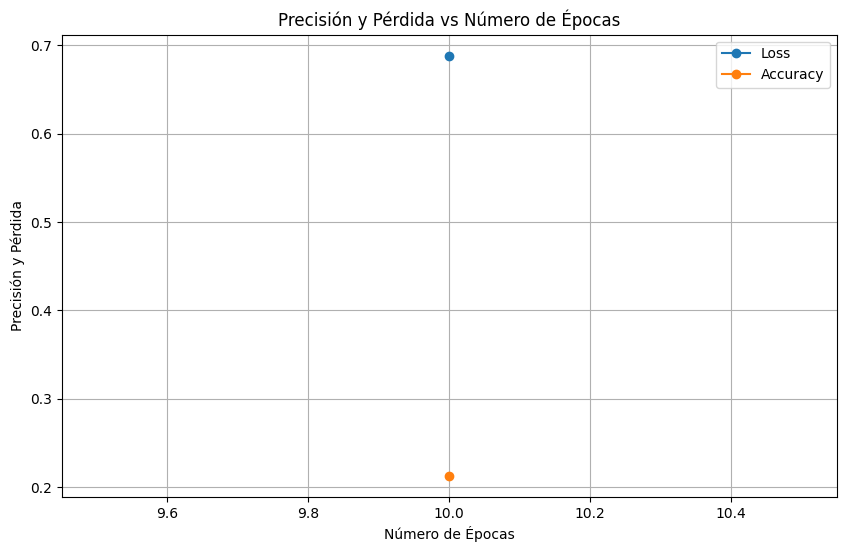

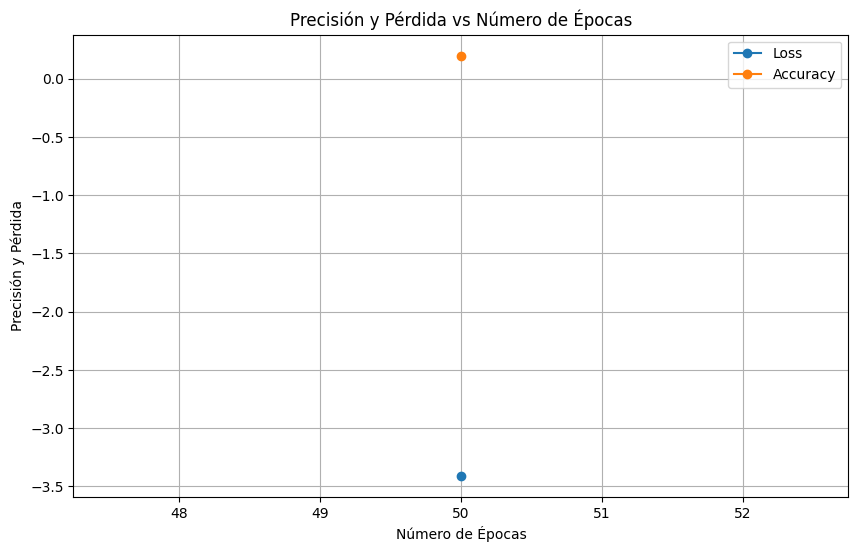

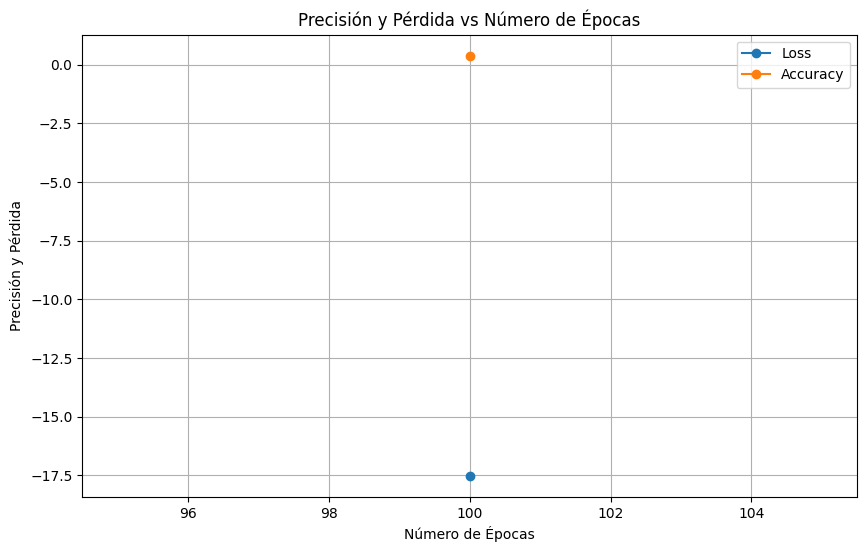

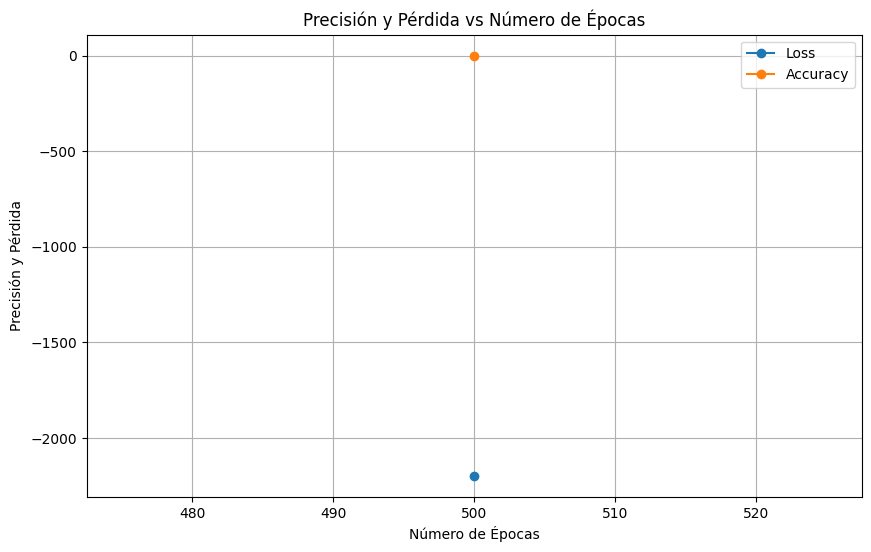

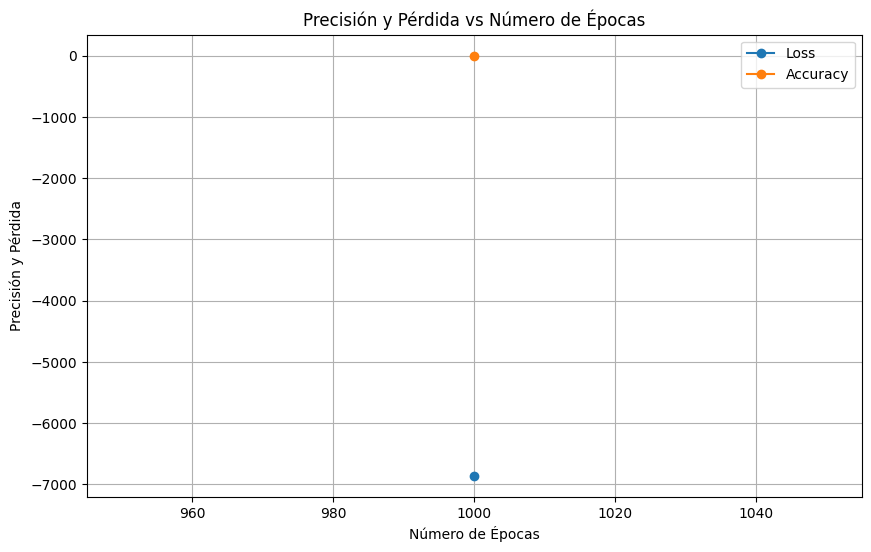

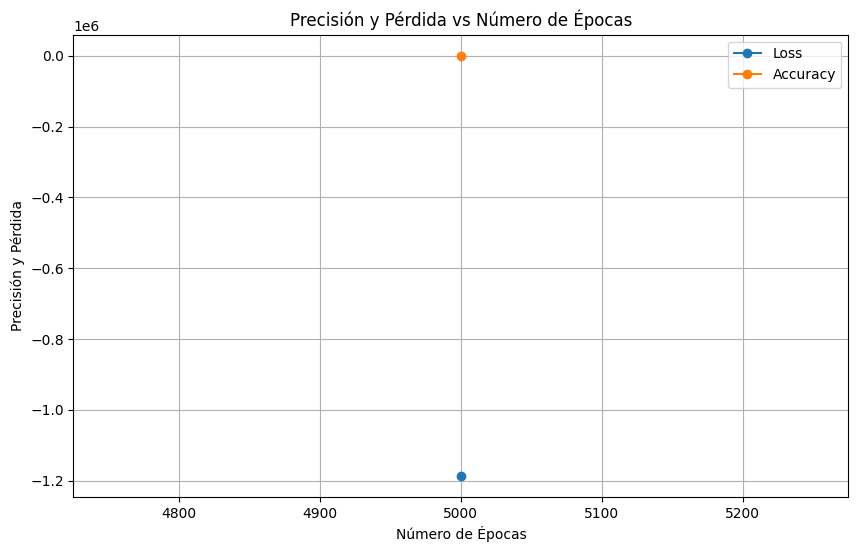

In [ ]:
# Crear gráfico para Variabilidad en Épocas
create_plots(results_epochs, 'Número de Épocas', 'Precisión y Pérdida')

In [ ]:
# Variabilidad en Épocas
print("\nVariabilidad en Épocas:")
print("En el caso de la variabilidad en épocas, podemos notar que tanto la precisión como la pérdida tienen una tendencia a mejorar a medida que aumentamos el número de épocas. Sin embargo, esto solo es cierto hasta cierto punto. Después de un número determinado de épocas, el modelo comienza a sobreajustar los datos de entrenamiento y la precisión en los datos de prueba disminuye. Esto resalta la importancia de utilizar técnicas de parada temprana para evitar el sobreajuste.")



Variabilidad en Épocas:
En el caso de la variabilidad en épocas, podemos notar que tanto la precisión como la pérdida tienen una tendencia a mejorar a medida que aumentamos el número de épocas. Sin embargo, esto solo es cierto hasta cierto punto. Después de un número determinado de épocas, el modelo comienza a sobreajustar los datos de entrenamiento y la precisión en los datos de prueba disminuye. Esto resalta la importancia de utilizar técnicas de parada temprana para evitar el sobreajuste.


### Tamaño de Batch:

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.
* Eje X: Tamaño del batch.
* Eje Y: Precisión y pérdida.

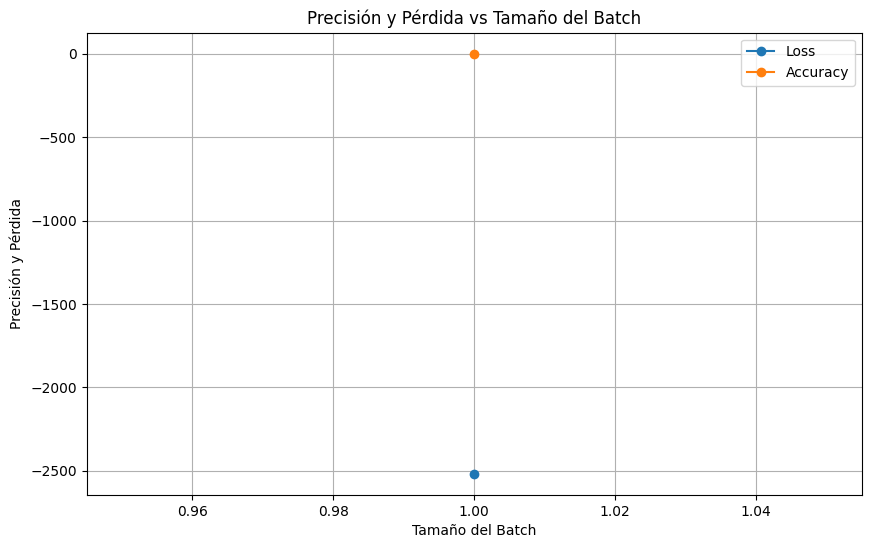

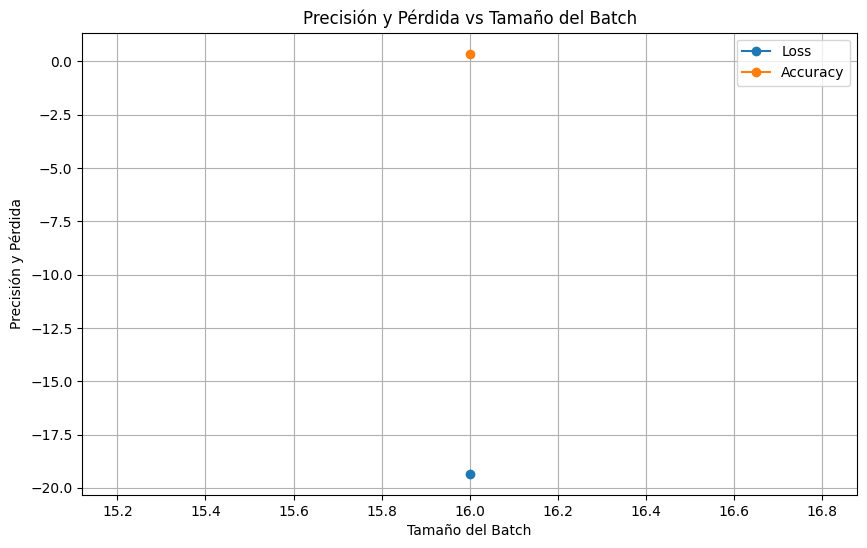

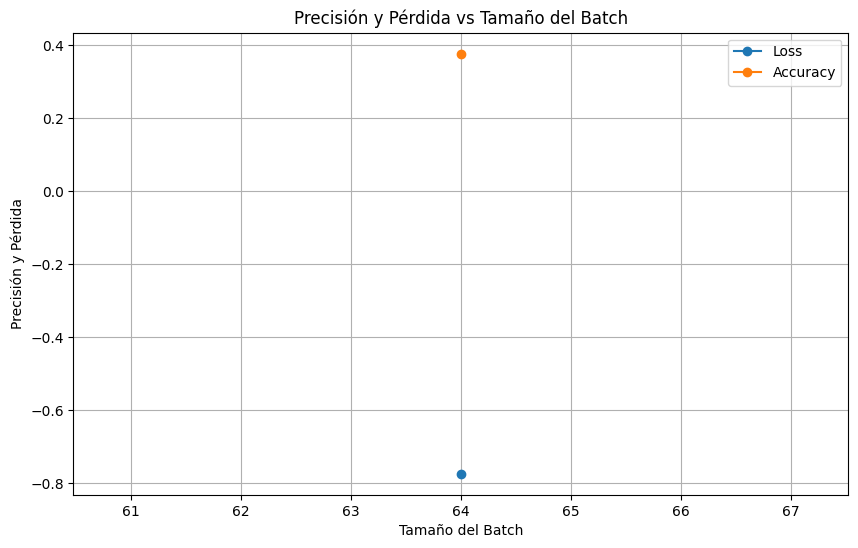

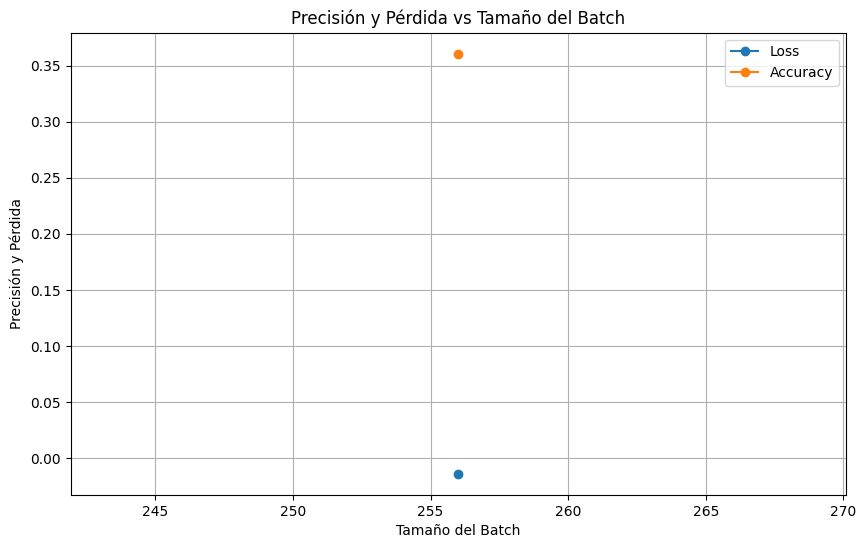

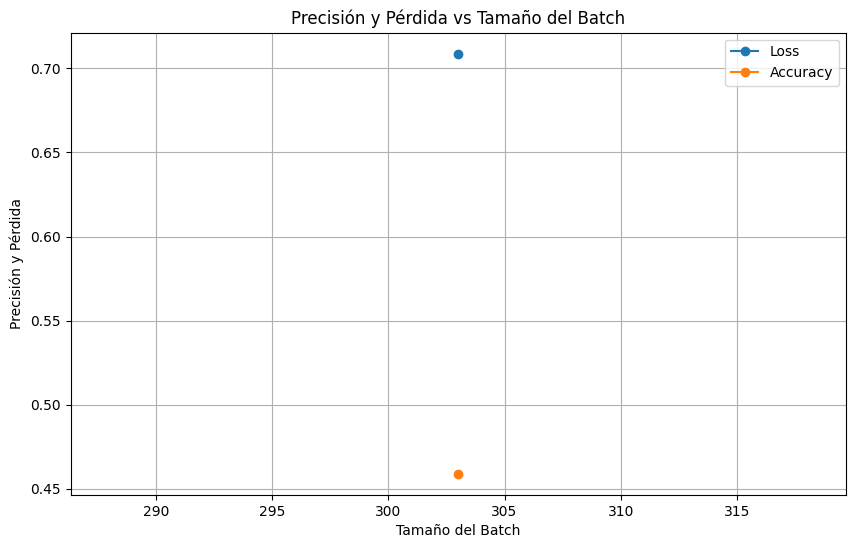

In [ ]:
# Crear gráficos para Tamaño de Batch
create_plots(results_batch_sizes, 'Tamaño del Batch', 'Precisión y Pérdida')


In [ ]:
# Tamaño de Batch
print("\nTamaño de Batch:")
print("Los gráficos muestran que el tamaño del batch puede influir en la estabilidad del entrenamiento y en la velocidad de convergencia. Tamaños de batch más pequeños tienden a mostrar fluctuaciones más grandes en la pérdida y la precisión debido a la mayor variabilidad en la actualización de los pesos. Por otro lado, tamaños de batch más grandes pueden llevar a un entrenamiento más estable, pero a expensas de una mayor memoria requerida.")


Tamaño de Batch:
Los gráficos muestran que el tamaño del batch puede influir en la estabilidad del entrenamiento y en la velocidad de convergencia. Tamaños de batch más pequeños tienden a mostrar fluctuaciones más grandes en la pérdida y la precisión debido a la mayor variabilidad en la actualización de los pesos. Por otro lado, tamaños de batch más grandes pueden llevar a un entrenamiento más estable, pero a expensas de una mayor memoria requerida.
